고양이 수염 스티커 만들기 대신 트럼프 마스크 씌우기로 자체변경하여 프로젝트 진행해보았습니다.

In [266]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [298]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/t1.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

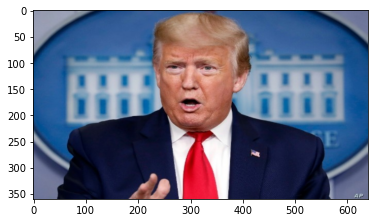

In [299]:
# 확인
plt.imshow(img_rgb)
plt.show()

In [300]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   # detector 선언

In [301]:
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of img pyramid)
print(dlib_rects)

rectangles[[(239, 82) (368, 211)]]


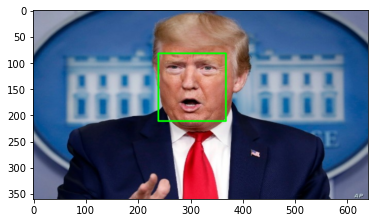

In [302]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [303]:
# 저장한 landmark 모델을 불러오기.

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

print("🌫🛸")

🌫🛸


In [304]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


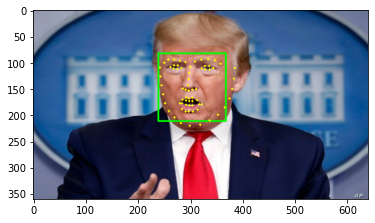

In [305]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [306]:
# 좌표확인

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[1][0]
    y = landmark[27][1]
    w = (landmark[15][0] - x)+20
    h = (landmark[8][1] - y)+20
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(x,y) : (243,108)
(w,h) : (160,132)


In [307]:
# 스티커를 읽고 윗 단계에서 계산한 크기로 resize

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/face-mask.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(132, 160, 3)


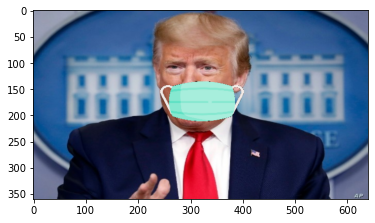

In [308]:
# bounding box와 landmark를 제거하고 최종 결과만 출력

sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]

img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker == 0, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 다른 사진1

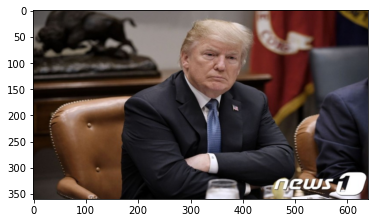

In [309]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/t2.jpg'
img_bgr = cv2.imread(my_image_path)    
img_bgr = cv2.resize(img_bgr, (640, 360))    
img_show = img_bgr.copy()     
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

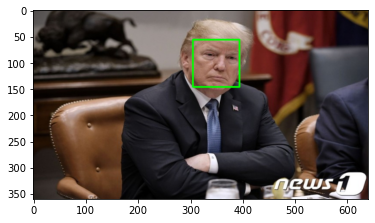

In [310]:
detector_hog = dlib.get_frontal_face_detector()   # detector 선언
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of img pyramid)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

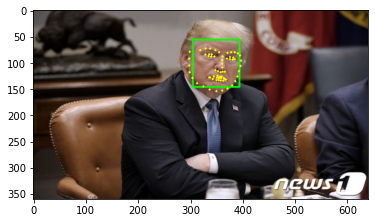

In [311]:
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

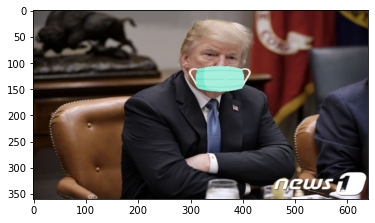

In [312]:
# 좌표확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[1][0]
    y = landmark[27][1]
    w = (landmark[15][0] - x)+20
    h = (landmark[8][1] - y)+20
    
# 스티커를 읽고 윗 단계에서 계산한 크기로 resize
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/face-mask.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

# bounding box와 landmark를 제거하고 최종 결과만 출력
sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker == 0, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 다른사진 2

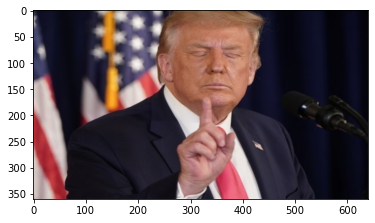

In [313]:
# 눈감은 사진
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/t3.jpg'
img_bgr = cv2.imread(my_image_path)    
img_bgr = cv2.resize(img_bgr, (640, 360))    
img_show = img_bgr.copy()     
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

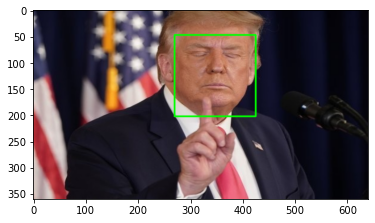

In [314]:
detector_hog = dlib.get_frontal_face_detector()   # detector 선언
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of img pyramid)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

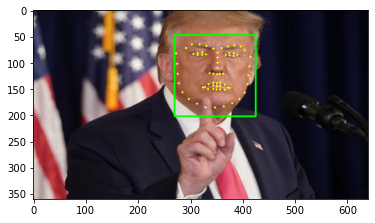

In [315]:
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

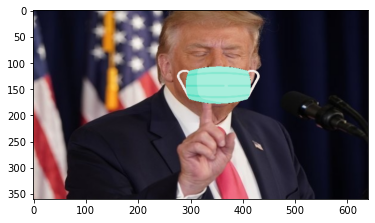

In [316]:
# 좌표확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[1][0]
    y = landmark[27][1]
    w = (landmark[15][0] - x)+20
    h = (landmark[8][1] - y)+20
    
# 스티커를 읽고 윗 단계에서 계산한 크기로 resize
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/face-mask.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

# bounding box와 landmark를 제거하고 최종 결과만 출력
sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker == 0, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

눈을 감아도 얼굴로 인식.

### 다른 사진 3

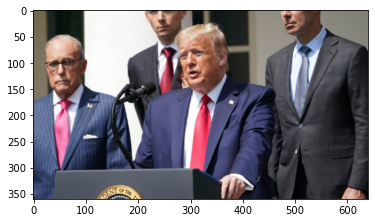

In [317]:
# 여러사람이 한 프레임에 있을 때
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/t4.jpg'
img_bgr = cv2.imread(my_image_path)    
img_bgr = cv2.resize(img_bgr, (640, 360))    
img_show = img_bgr.copy()     
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

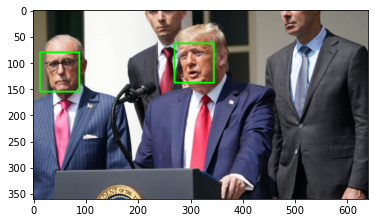

In [318]:
detector_hog = dlib.get_frontal_face_detector()   # detector 선언
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of img pyramid)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

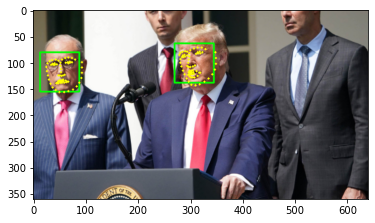

In [320]:
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
for landmark in list_landmarks:
    for idx, point in enumerate(landmark):                # landmark로 변경
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

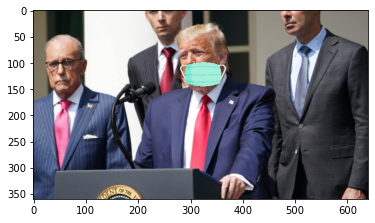

In [321]:
# 좌표확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[1][0]
    y = landmark[27][1]
    w = (landmark[15][0] - x)+20
    h = (landmark[8][1] - y)+20
    
# 스티커를 읽고 윗 단계에서 계산한 크기로 resize
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/face-mask.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

# bounding box와 landmark를 제거하고 최종 결과만 출력
sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker == 0, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

- 한 사람에게만 스티커가 씌어진다.    
- 얼굴로 인식한 다른 사람 마스크는 어떻게 씌우지..?
- 뒤에 두 명은 얼굴이 잘려서 그런지 인식 못함.

### 다른사진 4

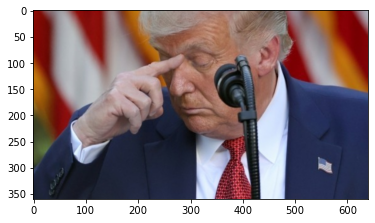

In [322]:
# 얼굴이 일부 가려진 사진
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/t11.jpg'
img_bgr = cv2.imread(my_image_path)    
img_bgr = cv2.resize(img_bgr, (640, 360))    
img_show = img_bgr.copy()     
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

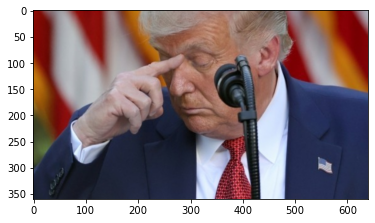

In [323]:
detector_hog = dlib.get_frontal_face_detector()   # detector 선언
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of img pyramid)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

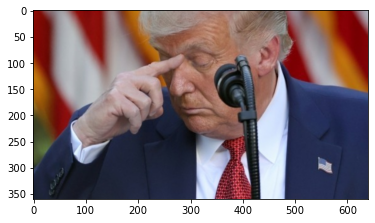

In [325]:
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- 한 쪽 눈이 가려진 사진은 얼굴로 인식을 못하는 듯.

### 다른사진 5

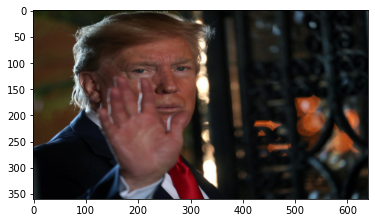

In [327]:
# 얼굴 일부가 가려졌지만 두 눈은 보이는 사진
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/t17.jpg'
img_bgr = cv2.imread(my_image_path)    
img_bgr = cv2.resize(img_bgr, (640, 360))    
img_show = img_bgr.copy()     
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

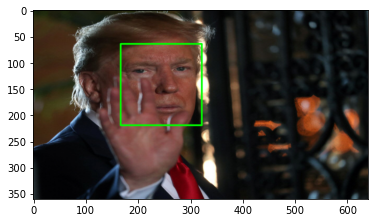

In [328]:
detector_hog = dlib.get_frontal_face_detector()   # detector 선언
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of img pyramid)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

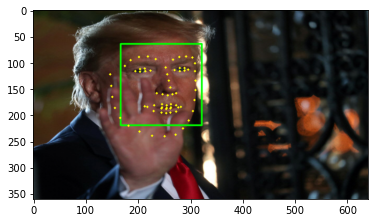

In [329]:
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

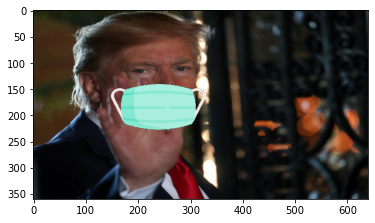

In [330]:
# 좌표확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[1][0]
    y = landmark[27][1]
    w = (landmark[15][0] - x)+20
    h = (landmark[8][1] - y)+20
    
# 스티커를 읽고 윗 단계에서 계산한 크기로 resize
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/face-mask.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

# bounding box와 landmark를 제거하고 최종 결과만 출력
sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker == 0, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

- 두 눈이 보여야 얼굴로 인식하는 듯하다.

### 다른 사진 6

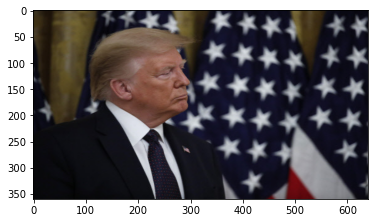

In [331]:
# 두 눈이 보여야 한다면 옆모습도 얼굴로 인식못하는 건가
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/t19.jpg'
img_bgr = cv2.imread(my_image_path)    
img_bgr = cv2.resize(img_bgr, (640, 360))    
img_show = img_bgr.copy()     
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

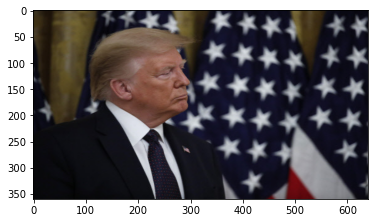

In [332]:
detector_hog = dlib.get_frontal_face_detector()   # detector 선언
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of img pyramid)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

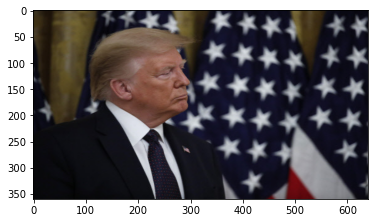

In [333]:
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- 옆모습에도 얼굴로 인식을 못하는 걸로 보아, 두 눈이 찍힌 정면이 얼굴로 인식하는 것 같다.